In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
filename='output/cloudstructure0010.dat'
#filename='/Users/michielm/WASP-107b/FinalRetrievals/Jeroen/output_full/cloudstructure.dat'
#filename='/Users/michielm/WISE-J1828/output_self/cloudstructure0010.dat'
Dist='00.10'
#filename='/Users/michielm/Complex3Dplanets/refl/D'+Dist+'AU_T8000/cloudstructure0010.dat'
#filename='/Users/michielm/Complex3Dplanets/outputHD189733b/cloudstructure0010.dat'
#filename='/Users/michielm/Complex3Dplanets/outputWASP-107b/cloudstructure0010.dat'
#filename='/Users/michielm/HR8799/FinalSetup/output_d/cloudstructure0004.dat'
#filename='/Users/michielm/WaterWorld/test/cloudstructure0010.dat'
with open(filename) as file:
    data1 = [[digit for digit in line.split()] for line in file]

nc=0
while('[s]' in data1[0][nc+4]):
    nc=nc+1

if(nc==0):
    nc=12

print(nc)
names=data1[0][4:4+nc]
print(names)
v_names=data1[0][4+nc:len(data1[0])-3]
print(v_names)

col=[]
for spec in names:
    if(spec=='Al2O3[s]'):
        col.append([1,0,0])
    elif(spec=='TiO2[s]'):
        col.append([0.85,0,0])
    elif(spec=='Fe[s]' or spec=='Fe'):
        col.append([0.7,0,0])
    elif(spec=='Zn[s]'):
        col.append([0.55,0,0])
    elif(spec=='Mn[s]'):
        col.append([0.4,0,0])
    elif(spec=='Cr[s]'):
        col.append([0.25,0,0])
    elif(spec=='SiO[s]' or spec=='SiO'):
        col.append([0,1,0])
    elif(spec=='SiO2[s]' or spec=='Silica'):
        col.append([0,0.75,0])
    elif(spec=='MgSiO3[s]' or spec=='Pyroxene'):
        col.append([0,0.50,0])
    elif(spec=='Mg2SiO4[s]' or spec=='Olivine'):
        col.append([0,0.25,0])
    elif(spec=='MnS[s]'):
        col.append([1,0.8,0])
    elif(spec=='ZnS[s]'):
        col.append([1,0.6,0])
    elif(spec=='FeS[s]'):
        col.append([0.8,0.48,0])
    elif(spec=='Na2S[s]'):
        col.append([0.6,0.36,0])
    elif(spec=='MgO[s]' or spec=='MgO'):
        col.append([0.4,0.24,0])
    elif(spec=='FeO[s]'):
        col.append([0.8,1,0.5])
    elif(spec=='Fe2O3[s]'):
        col.append([0.4,0.5,0.3])
    elif(spec=='NaCl[s]'):
        col.append([0,0,0.75])
    elif(spec=='KCl[s]'):
        col.append([0,0,0.50])
    elif(spec=='NH4Cl[s]'):
        col.append([0,0,0.25])
    elif(spec=='H2O[s]' or spec=='H2O'):
        col.append([0,1,1])
    elif(spec=='NH3[s]'):
        col.append([0,0.75,0.75])
    else:
        col.append([0.5,0.5,0.5])


10
['MgSiO3[s]', 'Mg2SiO4[s]', 'SiO2[s]', 'MgO[s]', 'FeO[s]', 'FeS[s]', 'Fe2O3[s]', 'Fe[s]', 'TiO2[s]', 'Al2O3[s]']
['SiO[v]', 'TiO[v]', 'Mg[v]', 'H2O[v]', 'H2S[v]', 'Fe[v]', 'Al[v]']


In [30]:
nsamples=len(data1)

xc=[]
P=[]
xt=[]
r=[]
xv=[]
for j in range(1,nsamples):
    P.append(float(data1[j][0]))
    r.append(float(data1[j][-3]))
    tot=0.0
    for i in range(0,len(names)):
        tot=tot+float(data1[j][i+3])+1e-50
    xt.append(tot)
for i in range(0,len(names)):
    xc.append([])
    for j in range(1,nsamples):
        xc[-1].append(float(data1[j][i+3])+1e-50)
for i in range(0,len(v_names)):
    xv.append([])
    for j in range(1,nsamples):
        xv[-1].append(float(data1[j][i+3+nc]))
print(len(P))

694


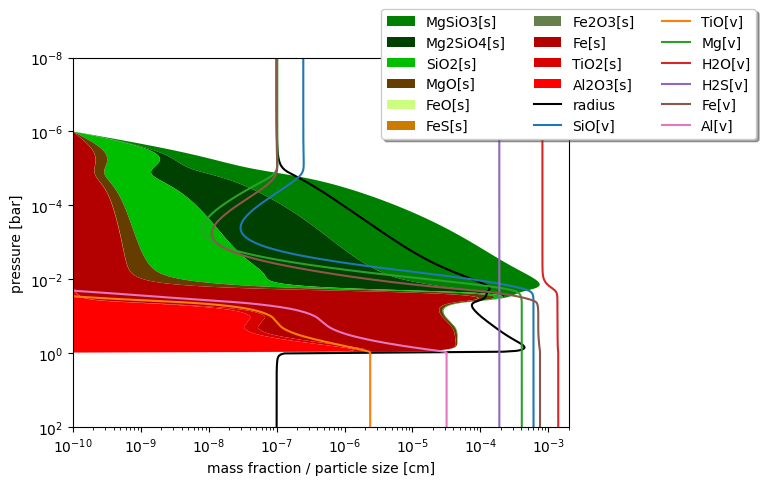

In [31]:
minx=1e-10
xf=[]
xf.append([])
for j in range(0,len(P)):
    xf[-1].append(xt[j])
for i in range(0,len(names)):
    xf.append([])
    for j in range(0,len(P)):
        xf[-1].append(10.**(np.log10(xf[-2][j])-max(0.,np.log10(xt[j])-np.log10(minx))*xc[i][j]/xt[j]))
xf.append([])
for j in range(0,len(P)):
    xf[-1].append(minx)

for i in range(1,len(names)+1):
#    plt.plot(xc[i],P,label=names[i])
    plt.fill_betweenx(P,xf[i-1],xf[i],label=names[i-1],color=col[i-1],linewidth=0)
#plt.plot(xt,P,linewidth=4)
plt.plot(r,P,label='radius',color='black')

for i in range(0,len(v_names)):
    plt.plot(xv[i],P,label=v_names[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('mass fraction / particle size [cm]')
plt.ylabel('pressure [bar]')
plt.ylim(1e2,1e-8)
plt.xlim(minx,2e-3)
plt.legend(loc='upper center', bbox_to_anchor=(1, 1.15),
          ncol=3, fancybox=True, shadow=True)

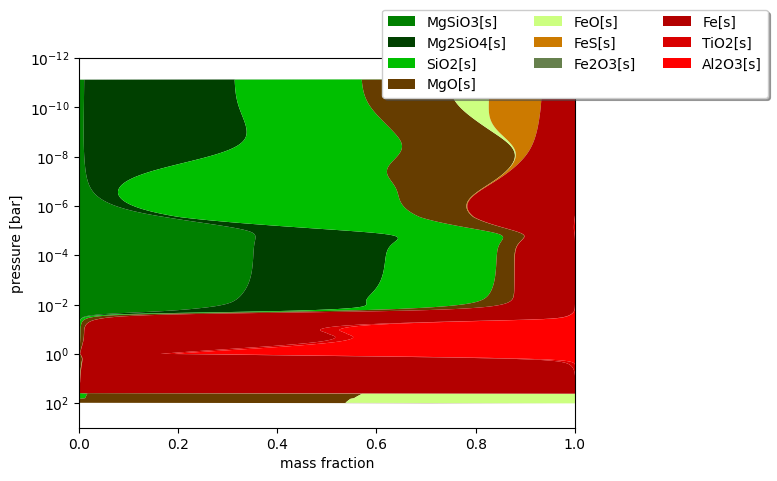

In [33]:
xfrac=[]
xfrac.append([])
for j in range(0,len(P)):
    if(xt[j] > 1e-40):
        xfrac[-1].append(0.0)
    else:
        xfrac[-1].append(1.0)
for i in range(0,len(names)):
    xfrac.append([])
    for j in range(0,len(P)):
        if(xt[j] > 1e-40):
            xfrac[-1].append(xfrac[-2][j]+xc[i][j]/xt[j])
        else:
            xfrac[-1].append(1.0)
xfrac.append([])
for j in range(0,len(P)):
    xfrac[-1].append(1.0)

for i in range(1,len(names)+1):
    plt.fill_betweenx(P,xfrac[i-1],xfrac[i],label=names[i-1],color=col[i-1],linewidth=0)

plt.yscale('log')
plt.xlabel('mass fraction')
plt.ylabel('pressure [bar]')
plt.ylim(1e3,1e-12)
plt.xlim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(1, 1.15),
          ncol=3, fancybox=True, shadow=True)